In [ ]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor

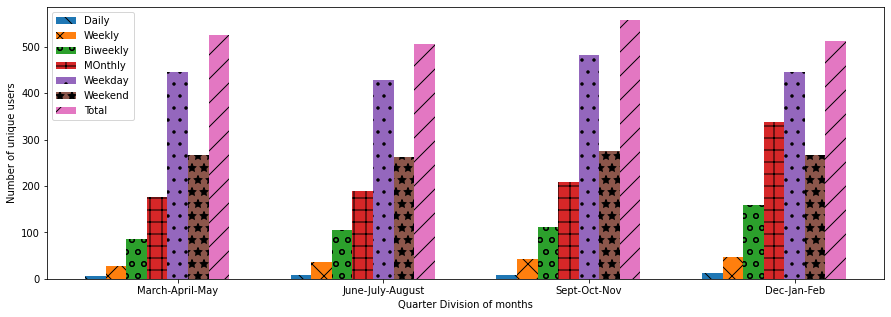

In [ ]:
# Plotting graph for daily , weekly , biweekly , monthly , week-day , weekend, total tweeter users quarterly
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 5),facecolor='white')

N = 4
ind = np.arange(N)
width = 0.1

Daily = [5, 9, 9, 12]
Weekly = [28, 37, 43, 47]
Biweekly = [85, 106, 111, 159]
Monthly = [176, 190, 208, 337]
Weekday = [445,428,483,446]
Weekend = [266,263,276,267]  
Total = [526,506,558,513]

bar1 = plt.bar(ind-width*3, Daily, width,hatch='\\')

bar2 = plt.bar(ind-width*2, Weekly, width,hatch = 'x')

bar3 = plt.bar(ind-width*1, Biweekly, width,hatch = 'o')

bar4 = plt.bar(ind, Monthly, width,hatch = '+')

bar5 = plt.bar(ind+width*1, Weekday, width,hatch = '.')

bar6 = plt.bar(ind+width*2, Weekend, width,hatch = '*')

bar7 = plt.bar(ind+width*3, Total, width,hatch='/')


plt.xlabel("Quarter Division of months")
plt.ylabel("Number of unique users")
#plt.title("No. of unique users tweeting daily,weekly,biweekly,monthly, on week days , weekend and total unique users for every quarter from March 2020 to Feb 2021")

plt.xticks(ind+width,['March-April-May','June-July-August','Sept-Oct-Nov','Dec-Jan-Feb'])
plt.legend( (bar1, bar2, bar3,bar4 , bar5, bar6 , bar7), ('Daily', 'Weekly', 'Biweekly','MOnthly','Weekday','Weekend','Total') )
plt.show()
fig.savefig("quarterly_bin.pdf",bbox_inches = 'tight')


In [ ]:
# import final_dataset
migration = pd.read_csv('/content/Final_dataset.csv')

In [ ]:
migration 

,Date,Half,SourceDestination,Value,Incoming,Outgoing,Lockdown,Delhi Covid Cases
0,3/1/2019,2,delhi-Gurgaon,0,0,0,No,1.0
1,3/2/2019,2,delhi-Gurgaon,0,0,0,No,2.0
2,3/3/2019,2,delhi-Gurgaon,0,0,1,No,1.0
3,3/4/2019,2,delhi-Gurgaon,0,0,0,No,2.0
4,3/5/2019,2,delhi-Gurgaon,0,0,0,No,1.0
...,...,...,...,...,...,...,...,...
9850,2/24/2022,2,delhi-Muzaffarnagar,0,0,0,unlock_seven,638802.0
9851,2/25/2022,2,delhi-Muzaffarnagar,0,0,0,unlock_seven,639101.0
9852,2/26/2022,2,delhi-Muzaffarnagar,0,0,0,unlock_seven,638742.0
9853,2/27/2022,2,delhi-Muzaffarnagar,0,1,0,unlock_seven,639125.0


In [ ]:
# replace 0 value by mean of above and below row data
for i in migration.index:
  if migration["Incoming"][i] == 0:
    if(i%365 == 0):
      migration["Incoming"][i] = migration["Incoming"][i+1]
    elif i%365 == 364:
      migration["Incoming"][i] = migration["Incoming"][i-1]
    else:
      migration["Incoming"][i] = (migration["Incoming"][i+1] + migration["Incoming"][i-1])//2

In [ ]:
# replace 0 value by mean of above and below row data
for i in migration.index:
  if migration["Outgoing"][i] == 0:
    if(i%365 == 0):
      migration["Outgoing"][i] = migration["Outgoing"][i+1]
    elif i%365 == 364:
      migration["Outgoing"][i] = migration["Outgoing"][i-1]
    else:
      migration["Outgoing"][i] = (migration["Outgoing"][i+1] + migration["Outgoing"][i-1])//2

In [ ]:
# Value is total migrations
migration['Value'] = migration['Incoming']+migration['Outgoing']

In [ ]:
# Net is incoming - outgoing
migration['Net'] = migration['Incoming']-migration['Outgoing']

<ipython-input-43-725a2e2b0404>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration['Net'] = migration['Incoming']-migration['Outgoing']


In [ ]:
# Convert final preprocessed data to csv file
migration.to_csv('Preprocessed_final_dataset.csv')